# Recursive Images and Fractals

## Recursive images

One of the cool thing about graphs is they can link to themselves. The reason why this is a graph and not a quad tree (as most maps are) is to create recursive images. 

Here we will see how to create a recursive image continuing from the getting started image. Let us create a recursive image where Mt. Tacoma is inside Seattle, and Seattle is inside Mt. Tacoma.

In [18]:
%pylab inline
import sys
import os
sys.path.insert(0,'..')
import graphmap
from graphmap.graphmap_main import GraphMap
from graphmap.memory_persistence import MemoryPersistence
from graphmap.graph_helpers import NodeLink

Populating the interactive namespace from numpy and matplotlib


In [19]:
G = GraphMap(MemoryPersistence())
seattle_skyline_image_url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/2/2f/Space_Needle002.jpg/640px-Space_Needle002.jpg'
mt_tacoma_image_url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/a/a2/Mount_Rainier_from_the_Silver_Queen_Peak.jpg/1024px-Mount_Rainier_from_the_Silver_Queen_Peak.jpg'
seattle_node_link = NodeLink('seattle')
mt_tacoma_node_link = NodeLink('tacoma')
G.create_node(root_node_link=seattle_node_link, image_value_link=seattle_skyline_image_url)
G.create_node(root_node_link=mt_tacoma_node_link, image_value_link=mt_tacoma_image_url)
insert_quad_key = '13'
created_node_link_result = G.connect_child(root_node_link=seattle_node_link,
                                    quad_key=insert_quad_key,
                                    child_node_link=mt_tacoma_node_link)
created_node_link = created_node_link_result.value
print(created_node_link_result)

Result(root@3lCis5Gi2okZxUJ3LPGD,0,)


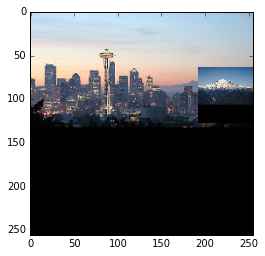

In [20]:
plt.imshow(G.get_image_at_quad_key(created_node_link, 256, '').value)

## Insert self
So far this has been same as the getting started example. Now to create a recursive graph, we will take the created node link and insert itself in the quad key '1333'. 

### Diagram
What we are trying to create is something like this
![recursive graph](https://artmapstore.blob.core.windows.net/firstnodes/photos/node_image_recurse2.png)

In [21]:
recursive_quad_key = '1333'
recursive_node_link_result = G.connect_child(root_node_link=created_node_link,
                                    quad_key=recursive_quad_key,
                                    child_node_link=created_node_link)
recursive_node_link = recursive_node_link_result.value
print(recursive_node_link_result)

Result(root@H2xtpwmXXfwbBc3xNkUt,0,)


### Result
Thus we have created a recursive image. This contains an image of Seattle, which has image of Tacoma, which has the first image in it. If you zoom in you will see more details

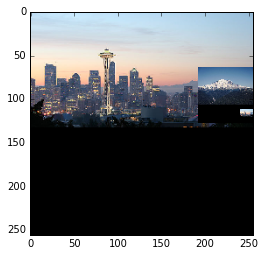

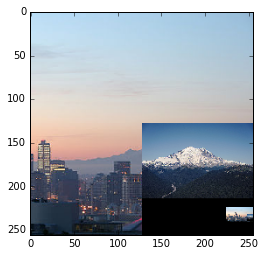

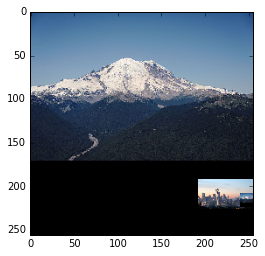

In [22]:
plt.imshow(G.get_image_at_quad_key(recursive_node_link, 256, '').value)
plt.figure()
plt.imshow(G.get_image_at_quad_key(recursive_node_link, 256, '1').value)
plt.figure()
plt.imshow(G.get_image_at_quad_key(recursive_node_link, 256, '13').value)

## Fractals

Suppose we want to create an infinitely thin line. We could describe it this neat way

```
self = [ self , blue ]
       [ green, self ]
```

As it replaces self with definition of self it will look like this 

![Starting thin line](https://artmapstore.blob.core.windows.net/firstnodes/photos/fractal_imagetree_line.png)

The end product will be

![Created thin line](https://artmapstore.blob.core.windows.net/firstnodes/photos/green_blue2.png)


This is an infinitely thin line between colors blue and green. You can keep zooming but never see a blunt edge. View it in [KaiiMaps](http://kaiimap.org/view?node_link=line@https://artmapstore.blob.core.windows.net/firstnodes/line.tsv.gz)